In [87]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '/home/ubuntu/roger/Machine_Learning_Immunogenicity/src')
import onehot
from gzip import GzipFile
import copy

In [12]:
%pwd

u'/home/roger/Machine_Learning_Immunogenicity'

In [13]:
tcell_all=pd.read_table("/home/roger/other/Machine_Learning_Immunogenicity/data/tcell.txt.gz",compression='gzip')
tcell_all.shape

(278230, 27)

In [14]:
tcell_comp=pd.read_table('/home/roger/other/Machine_Learning_Immunogenicity/data/tcell_peptide_allele_nodups.txt.gz',compression='gzip')

In [15]:
print tcell_comp.shape

(77970, 3)


In [16]:
tcell_comp.head(10)

,Description,Allele Name,bin
0,KLEDLERDL,HLA-A*02:01,1
1,IEQQADNMITEMLQK,H2-IAk,1
2,SGEGWPYIACRTSVVGRAWE,H2-IAb,1
3,TRVAFAGL,H2-Kb,1
4,AVAKAGKPL,HLA-E*01:01,1
5,AMLQDIATL,HLA-E*01:01,1
6,KMLRGVNVL,HLA-E*01:01,1
7,AAVEELKAL,HLA-E*01:01,0
8,VEGEALATL,HLA-E*01:01,0
9,AEWPTFNVGW,HLA-B*44:03,1


In [17]:
map(len,tcell_comp['Description'])

[9,
 15,
 20,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 15,
 14,
 10,
 11,
 20,
 9,
 9,
 9,
 10,
 10,
 9,
 10,
 10,
 9,
 10,
 9,
 9,
 15,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 18,
 12,
 9,
 10,
 9,
 12,
 9,
 15,
 15,
 10,
 9,
 9,
 9,
 15,
 9,
 7,
 9,
 20,
 15,
 15,
 23,
 15,
 15,
 15,
 20,
 23,
 15,
 15,
 23,
 15,
 15,
 20,
 15,
 23,
 20,
 20,
 15,
 15,
 15,
 15,
 15,
 15,
 20,
 15,
 20,
 15,
 20,
 15,
 15,
 15,
 15,
 15,
 15,
 9,
 9,
 9,
 9,
 20,
 20,
 20,
 20,
 15,
 15,
 15,
 20,
 10,
 10,
 10,
 10,
 10,
 20,
 10,
 18,
 39,
 39,
 14,
 26,
 26,
 26,
 16,
 31,
 9,
 9,
 13,
 9,
 13,
 9,
 9,
 9,
 9,
 9,
 9,
 13,
 23,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 9,
 9,
 13,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 15,
 15,
 20,
 15,
 14,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 10,
 20,
 9,
 9,
 9,
 16,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 30,
 22,
 31,
 30,


(array([  141, 22314, 44689,  9370,   695,   485,   113,    70,    51,
          30,    10,     1,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     1]), array([   3.        ,    7.56666667,   12.13333333,   16.7       ,
         21.26666667,   25.83333333,   30.4       ,   34.96666667,
         39.53333333,   44.1       ,   48.66666667,   53.23333333,
         57.8       ,   62.36666667,   66.93333333,   71.5       ,
         76.06666667,   80.63333333,   85.2       ,   89.76666667,
         94.33333333,   98.9       ,  103.46666667,  108.03333333,
        112.6       ,  117.16666667,  121.73333333,  126.3       ,
        130.86666667,  135.43333333,  140.        ]))


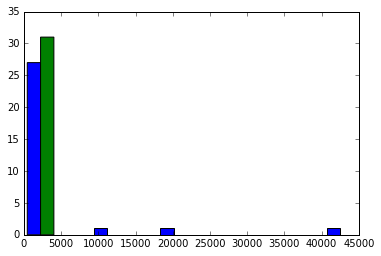

76134


In [18]:
print np.histogram(map(len,tcell_comp['Description']),bins=30)
plt.hist(np.histogram(map(len,tcell_comp['Description']),bins=30))
plt.show()
print np.sum(np.asarray(map(len,tcell_comp['Description'])) <= 20)

In [19]:
tcell_clean1=tcell_comp[tcell_comp['Allele Name'].notnull()]
tcell_clean2=tcell_clean1[tcell_clean1['Description'].notnull()]
tcell_clean=tcell_clean2[tcell_clean2['bin'].notnull()]

print tcell_clean.shape
tcell_clean

(44524, 3)


,Description,Allele Name,bin
0,KLEDLERDL,HLA-A*02:01,1
1,IEQQADNMITEMLQK,H2-IAk,1
2,SGEGWPYIACRTSVVGRAWE,H2-IAb,1
3,TRVAFAGL,H2-Kb,1
4,AVAKAGKPL,HLA-E*01:01,1
5,AMLQDIATL,HLA-E*01:01,1
6,KMLRGVNVL,HLA-E*01:01,1
7,AAVEELKAL,HLA-E*01:01,0
8,VEGEALATL,HLA-E*01:01,0
9,AEWPTFNVGW,HLA-B*44:03,1


In [24]:
print np.sum(tcell_clean['bin'])
tcell_clean['Allel']=pd.Categorical.from_array(tcell_clean['Allele Name']).codes
tcell_clean.head(10)
#plt.hist(np.histogram(tcell_clean['Allele Name'],bins=50))
#plt.show()
#print np.sum(np.asarray(tcell_all['MHC Allele ID']) < 50)

15243


,Description,Allele Name,bin,Allel
0,KLEDLERDL,HLA-A*02:01,1,91
1,IEQQADNMITEMLQK,H2-IAk,1,49
2,SGEGWPYIACRTSVVGRAWE,H2-IAb,1,46
3,TRVAFAGL,H2-Kb,1,62
4,AVAKAGKPL,HLA-E*01:01,1,328
5,AMLQDIATL,HLA-E*01:01,1,328
6,KMLRGVNVL,HLA-E*01:01,1,328
7,AAVEELKAL,HLA-E*01:01,0,328
8,VEGEALATL,HLA-E*01:01,0,328
9,AEWPTFNVGW,HLA-B*44:03,1,154


In [25]:
# scaling factors
print tcell_clean.columns

Index([u'Description', u'Allele Name', u'bin', u'Allel'], dtype='object')


In [26]:
def to_ascii(letter):
    if pd.isnull(letter):
        return 0
    else:
        return ord(letter)

In [28]:
print tcell_clean.shape
tcell_clean.index

(44524, 4)


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            77960, 77961, 77962, 77963, 77964, 77965, 77966, 77967, 77968,
            77969],
           dtype='int64', length=44524)

In [30]:
leng_seq=len(tcell_clean.Description.get(1))
print tcell_clean.Allel.get(0)
print tcell_clean.bin.get(0)
print leng_seq
map(to_ascii,tcell_clean.Description.get(1))[:15]

91
1
15


[73, 69, 81, 81, 65, 68, 78, 77, 73, 84, 69, 77, 76, 81, 75]

In [224]:
number_data=tcell_clean.shape[0]
number_feature=51
tcell_data=np.zeros([number_data,number_feature+1])
print number_data
j=0
for i in tcell_clean.index:
    tcell_data[j,0]=tcell_clean.Allel.get(i)
    tcell_data[j,number_feature]=tcell_clean.bin.get(i)
    leng_seq=len(tcell_clean.Description.get(i))
    if leng_seq <=number_feature-1:
        tcell_data[j,1:leng_seq+1]=map(to_ascii,tcell_clean.Description.get(i))
    else:
        tcell_data[j,1:number_feature]=map(to_ascii,tcell_clean.Description.get(i))[:number_feature-1]
    j=j+1


44524


In [225]:
print tcell_data[3,:]

[ 62.  84.  82.  86.  65.  70.  65.  71.  76.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   1.]


In [226]:
tcell_clean.head(10)

,Description,Allele Name,bin,Allel
0,KLEDLERDL,HLA-A*02:01,1,91
1,IEQQADNMITEMLQK,H2-IAk,1,49
2,SGEGWPYIACRTSVVGRAWE,H2-IAb,1,46
3,TRVAFAGL,H2-Kb,1,62
4,AVAKAGKPL,HLA-E*01:01,1,328
5,AMLQDIATL,HLA-E*01:01,1,328
6,KMLRGVNVL,HLA-E*01:01,1,328
7,AAVEELKAL,HLA-E*01:01,0,328
8,VEGEALATL,HLA-E*01:01,0,328
9,AEWPTFNVGW,HLA-B*44:03,1,154


In [227]:
np.random.shuffle(tcell_data)
tcell_data[:2,:]
#tcell_shuf.dt

array([[ 331.,   76.,   76.,   69.,   81.,   81.,   75.,   65.,   65.,
          81.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 332.,   81.,   69.,   76.,   86.,   68.,   67.,   65.,   83.,
          81.,   78.,   71.,   67.,   72.,   71.,   68.,   84.,   73.,
          80.,   82.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.]])

In [228]:
tcell_array=np.asarray(tcell_data)
num_total=tcell_array.shape[0]
train_num=30000
valid_num=7000
test_num=num_total-train_num-valid_num
train_set=tcell_array[:train_num,:number_feature]
#train_lable=tcell_array[:train_num,number_feature]
train_lable=(np.arange(2)==tcell_array[:train_num,number_feature][:,None]).astype(np.float32)

valid_set=tcell_array[train_num:train_num+valid_num,:number_feature]
#valid_lable=tcell_array[]
valid_lable=(np.arange(2)==tcell_array[train_num:train_num+valid_num,number_feature][:,None]).astype(np.float32)

test_set=tcell_array[train_num+valid_num:,:number_feature]
#test_lable=tcell_array[train_num+valid_num:,number_feature]
test_lable=(np.arange(2)==tcell_array[train_num+valid_num:,number_feature][:,None]).astype(np.float32)

print train_set.shape, train_lable.shape, valid_set.shape, valid_lable.shape, test_set.shape, test_lable.shape

(30000, 51) (30000, 2) (7000, 51) (7000, 2) (7524, 51) (7524, 2)


In [235]:
batch_size=1000
hidden_size=100
num_lable=2
graph=tf.Graph()
with graph.as_default():
    train_set_batch=tf.placeholder(tf.float32,shape=(batch_size,number_feature))
    train_lable_batch=tf.placeholder(tf.float32,shape=(batch_size,num_lable))
    
    valid_set_tf=tf.constant(valid_set.astype(np.float32))
    test_set_tf=tf.constant(test_set.astype(np.float32))
    
    weights1=tf.Variable(tf.truncated_normal([number_feature,hidden_size]))
    bias1=tf.Variable(tf.zeros([hidden_size]))
    
    weights2=tf.Variable(tf.truncated_normal([hidden_size,num_lable]))
    bias2=tf.Variable(tf.zeros([num_lable]))
    
    logits1=tf.matmul(train_set_batch,weights1)+bias1
    act1=tf.nn.relu(logits1)
    logits=tf.matmul(act1,weights2)+bias2

    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits,train_lable_batch))
    
    optimizer=tf.train.GradientDescentOptimizer(0.00005).minimize(loss)
    
    train_pred=tf.nn.softmax(logits)
    valid_pred=tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(valid_set_tf,weights1)+bias1),weights2)+bias2)
    test_pred=tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(test_set_tf,weights1)+bias1),weights2)+bias2)

In [236]:
np.sum(np.array([1,2,3])*np.array([1,2,3]))
np.sum(train_lable[:,1])
1-np.argmax(np.array([[0.1,0.6],[0.,0.9],[0.8,0.1]]), 1)

array([0, 0, 1])

In [237]:
num_step=10000
#def accuracy(predictions, labels):
#  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
#          / predictions.shape[0])
def accuracy(predictions, labels):
    pre=np.argmax(predictions, 1.)
    lab=np.argmax(labels, 1.)
    #print pre[:100]
    #print lab[:100]
    posi=np.sum(pre*lab).astype(np.float32)/np.sum(lab).astype(np.float32)
    #print np.sum(pre*lab)
    #print posi
    neg=np.sum((1.-pre)*(1.-lab)).astype(np.float32)/np.sum(1-lab).astype(np.float32)
    #print neg
    return 100.*2.*posi*neg/(posi+neg)
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for i in range(num_step):
        offset=i*batch_size % train_num
        train_set_feed=train_set[offset:offset+batch_size,:]
        train_lable_feed=train_lable[offset:offset+batch_size]
        feed_dict={train_set_batch:train_set_feed, train_lable_batch:train_lable_feed}
        _,l,pred=session.run([optimizer,loss,train_pred],feed_dict=feed_dict)
        if (i % 20)==0:
            print("Minibatch loss at step %d: %f" % (i, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(pred, train_lable_feed))
            print("Validation accuracy: %.1f%%" % accuracy(valid_pred.eval(), valid_lable))
    print("Test accuracy: %.1f%%" % accuracy(test_pred.eval(), test_lable))

Initialized
Minibatch loss at step 0: 248.767426
Minibatch accuracy: 16.6%
Validation accuracy: 36.0%
Minibatch loss at step 20: 151.582779
Minibatch accuracy: 45.8%
Validation accuracy: 46.1%
Minibatch loss at step 40: 166.709595
Minibatch accuracy: 41.0%
Validation accuracy: 47.3%
Minibatch loss at step 60: 149.081772
Minibatch accuracy: 46.5%
Validation accuracy: 47.3%
Minibatch loss at step 80: 131.703171
Minibatch accuracy: 48.6%
Validation accuracy: 47.3%
Minibatch loss at step 100: 147.153473
Minibatch accuracy: 43.3%
Validation accuracy: 48.9%
Minibatch loss at step 120: 130.955261
Minibatch accuracy: 45.8%
Validation accuracy: 48.1%
Minibatch loss at step 140: 115.966362
Minibatch accuracy: 49.3%
Validation accuracy: 48.1%
Minibatch loss at step 160: 130.486893
Minibatch accuracy: 44.5%
Validation accuracy: 49.8%
Minibatch loss at step 180: 115.293640
Minibatch accuracy: 46.4%
Validation accuracy: 49.5%
Minibatch loss at step 200: 102.301773
Minibatch accuracy: 49.7%
Validatio

In [168]:
train_set.shape

(30000, 51)